In [338]:
#Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

In [340]:
#Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 24357 files belonging to 23 classes.


In [342]:
#Validating Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8600 files belonging to 23 classes.


In [343]:
#model.compile(tf.images.resize(images, (16,16), method=ResizeMethod.gaussian))

In [344]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 23), dtype=tf.float32, name=None))>

In [345]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[2.27882812e+02 1.53392334e+02 1.63776367e+02]
   [2.31714600e+02 1.56046387e+02 1.68515625e+02]
   [2.27667480e+02 1.54646729e+02 1.65975586e+02]
   ...
   [2.41688477e+02 1.69742188e+02 1.82459961e+02]
   [2.35016113e+02 1.63531738e+02 1.74926025e+02]
   [2.45756104e+02 1.75564941e+02 1.88327637e+02]]

  [[2.10907715e+02 1.41789062e+02 1.51761475e+02]
   [2.01231445e+02 1.36390869e+02 1.47723633e+02]
   [2.03645264e+02 1.37070312e+02 1.44049072e+02]
   ...
   [2.40810303e+02 1.70406738e+02 1.80484619e+02]
   [2.35882812e+02 1.69656250e+02 1.79217285e+02]
   [2.44141113e+02 1.72141113e+02 1.85396240e+02]]

  [[2.28130127e+02 1.55732666e+02 1.68641357e+02]
   [2.31335693e+02 1.56070557e+02 1.71036621e+02]
   [2.27906250e+02 1.52610840e+02 1.65484375e+02]
   ...
   [2.41396973e+02 1.69578125e+02 1.82555420e+02]
   [2.41927246e+02 1.71216309e+02 1.85724365e+02]
   [2.44491455e+02 1.72157227e+02 1.84180664e+02]]

  ...

  [[2.15065918e+02 1.47998291e+02 1.48065918e+02]
   [2

Building Model

In [347]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [348]:
model = Sequential()

In [349]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [350]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [351]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [352]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [353]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [354]:
model.add(Dropout(0.25))

In [355]:
model.add(Flatten())

In [356]:
model.add(Dense(units=1500,activation='relu'))

In [357]:
model.add(Dropout(0.4))

In [358]:
model.add(Dense(units=23,activation='softmax'))

Compiling

In [360]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [361]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_73 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_74 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_75 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

Model Training

In [363]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20
762/762 [==============================] - 2897s 4s/step - loss: 2.1737 - accuracy: 0.3147 - val_loss: 2.8807 - val_accuracy: 0.2145
Epoch 2/20
762/762 [==============================] - 2649s 3s/step - loss: 1.8945 - accuracy: 0.4033 - val_loss: 3.2155 - val_accuracy: 0.1793
Epoch 3/20
762/762 [==============================] - 2537s 3s/step - loss: 1.7687 - accuracy: 0.4476 - val_loss: 3.6089 - val_accuracy: 0.1398
Epoch 4/20
762/762 [==============================] - 3202s 4s/step - loss: 1.6497 - accuracy: 0.4870 - val_loss: 3.5586 - val_accuracy: 0.2160
Epoch 5/20
762/762 [==============================] - 4751s 6s/step - loss: 1.5312 - accuracy: 0.5222 - val_loss: 3.8132 - val_accuracy: 0.2070
Epoch 6/20
762/762 [==============================] - 3147s 4s/step - loss: 1.3773 - accuracy: 0.5755 - val_loss: 3.8521 - val_accuracy: 0.2502
Epoch 7/20
762/762 [==============================] - 2492s 3s/step - loss: 1.1980 - accuracy: 0.6328 - val_loss: 4.5879 - val_accuracy:

In [ ]:
##Model Evaluations

In [387]:
train_loss, train_acc = model.evaluate(training_set)

762/762 [==============================] - 941s 1s/step - loss: 0.1560 - accuracy: 0.9543


In [388]:
print('Training accuracy:', train_acc)

Training accuracy: 0.9542636871337891


In [389]:
val_loss, val_acc = model.evaluate(training_set)

762/762 [==============================] - 867s 1s/step - loss: 0.1560 - accuracy: 0.9543


In [390]:
print('Training accuracy:', val_acc)

Training accuracy: 0.9542636871337891


In [ ]:
##Saving Model

In [391]:
model.save('trained_model.keras')

In [392]:
training_history.history

{'loss': [2.173652172088623,
  1.8944931030273438,
  1.7687467336654663,
  1.6496715545654297,
  1.531209945678711,
  1.377307653427124,
  1.1980342864990234,
  0.9939787983894348,
  0.8056256771087646,
  0.6389946341514587,
  0.5255182385444641,
  0.43274277448654175,
  0.37200677394866943,
  0.31454068422317505,
  0.27513331174850464,
  0.2611779272556305,
  0.22934629023075104,
  0.19956423342227936,
  0.19024629890918732,
  0.18253357708454132],
 'accuracy': [0.3146939277648926,
  0.40333375334739685,
  0.44755101203918457,
  0.4870058000087738,
  0.5222318172454834,
  0.5755224227905273,
  0.632795512676239,
  0.6944205164909363,
  0.7496407628059387,
  0.8000574707984924,
  0.8331896662712097,
  0.863283634185791,
  0.8790901899337769,
  0.8987560272216797,
  0.9119760394096375,
  0.9186681509017944,
  0.9282752275466919,
  0.9382518529891968,
  0.9402225017547607,
  0.9424395561218262],
 'val_loss': [2.8806958198547363,
  3.2155003547668457,
  3.6089179515838623,
  3.55864977836

In [393]:
#record history

In [394]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
#Visualizing Accuracy

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
#Additional

In [403]:
class_name = validation_set.class_names

In [405]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8600 files belonging to 23 classes.


In [412]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

8600/8600 [==============================] - 531s 61ms/step


In [413]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [414]:
Y_true

<tf.Tensor: shape=(8600,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)>

In [415]:
predicted_categories

<tf.Tensor: shape=(8600,), dtype=int64, numpy=array([13, 16, 22, ...,  2,  2,  2], dtype=int64)>

In [419]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [421]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.08      0.10      0.09       176
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.14      0.04      0.06       944
                                          Atopic Dermatitis Photos       0.19      0.91      0.31       349
                                            Bullous Disease Photos       0.10      0.09      0.09        90
                Cellulitis Impetigo and other Bacterial Infections       0.00      0.00      0.00        72
                                                     Eczema Photos       0.39      0.26      0.31       614
                                      Exanthems and Drug Eruptions       0.08      0.14      0.10        80
                 Hair Loss Photos Alopecia and other Hair Diseases       0.12      0.06      0.08        48
                           

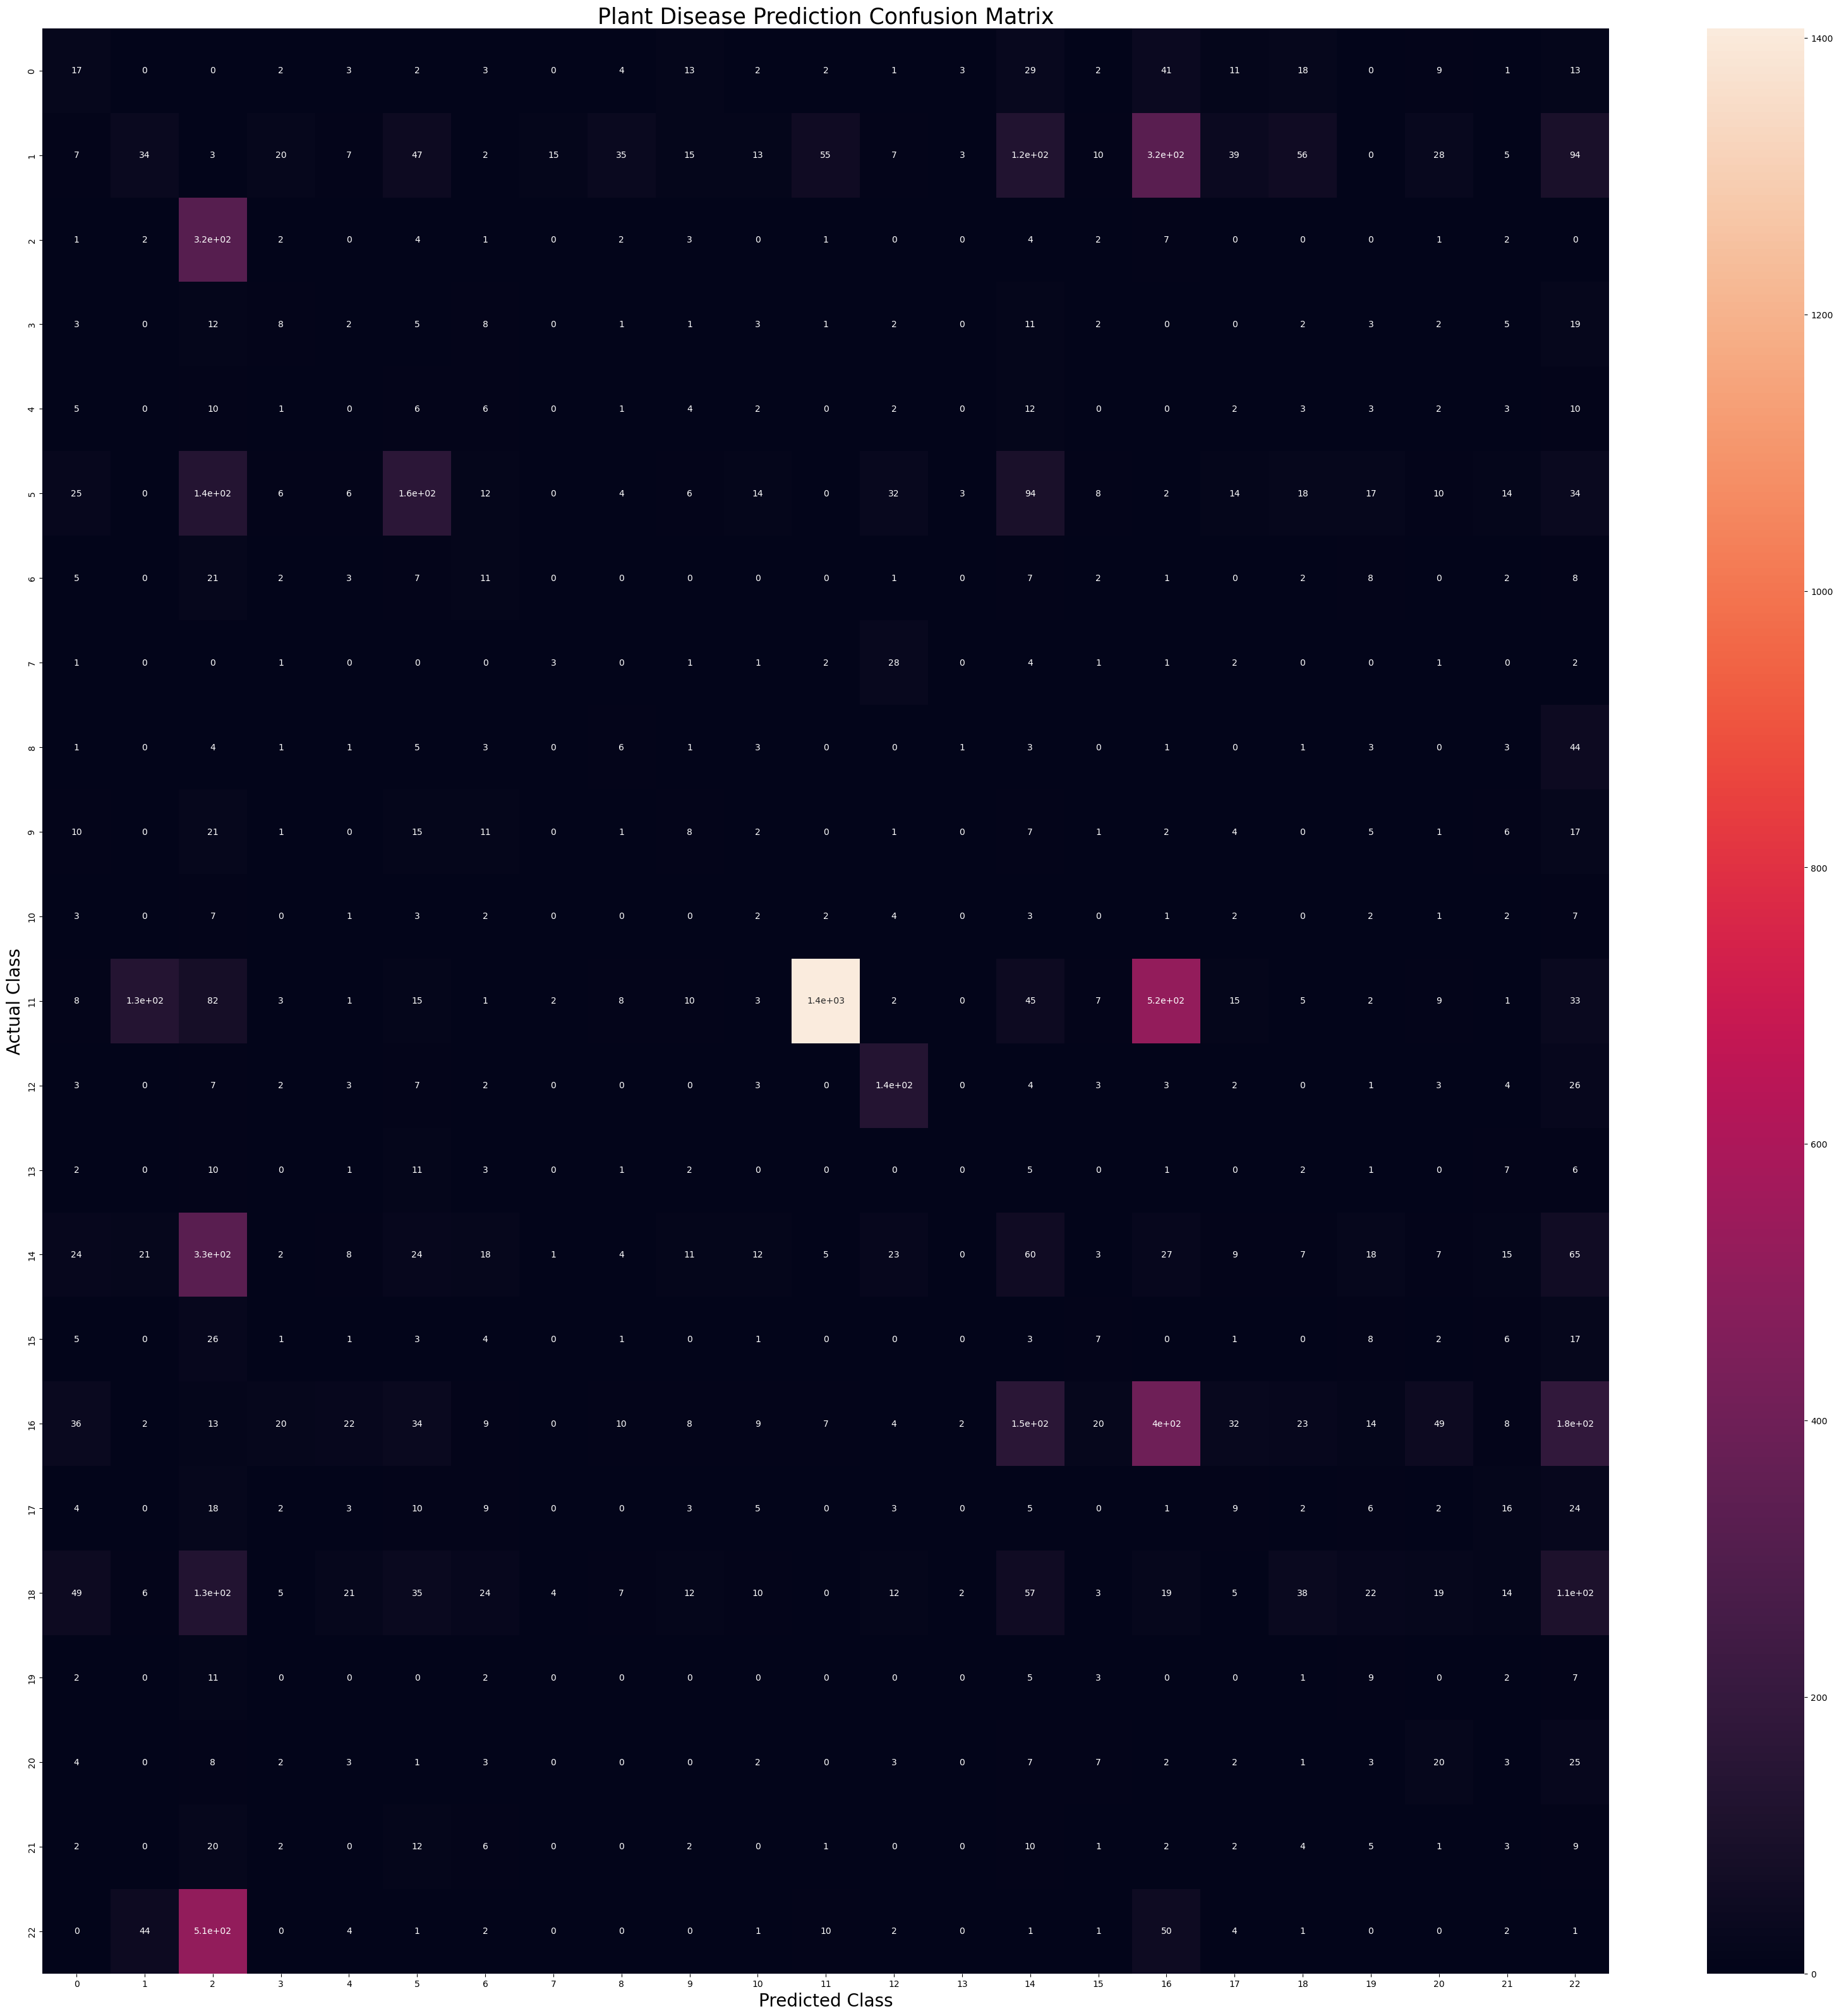

In [423]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()